## **E-commerce Sales**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data cleaning and preprocessing

### Subtask:
Handle missing values, convert 'InvoiceDate' to datetime objects, and address inconsistencies or outliers in 'Quantity' or 'UnitPrice'.


**Reasoning**:
Check for missing values in the DataFrame and display the count of missing values for each column.



In [5]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Reasoning**:
Drop rows with missing 'CustomerID', convert 'InvoiceDate' to datetime, and remove rows with non-positive 'Quantity' or 'UnitPrice'.



In [6]:
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory data analysis (eda)

### Subtask:
Analyze sales trends, identify top-selling products, explore customer behavior, and visualize geographical distribution of sales.


**Reasoning**:
Calculate the 'TotalPrice' for each row by multiplying 'Quantity' and 'UnitPrice'.



In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**Reasoning**:
Analyze overall sales trends over time by aggregating sales by month.



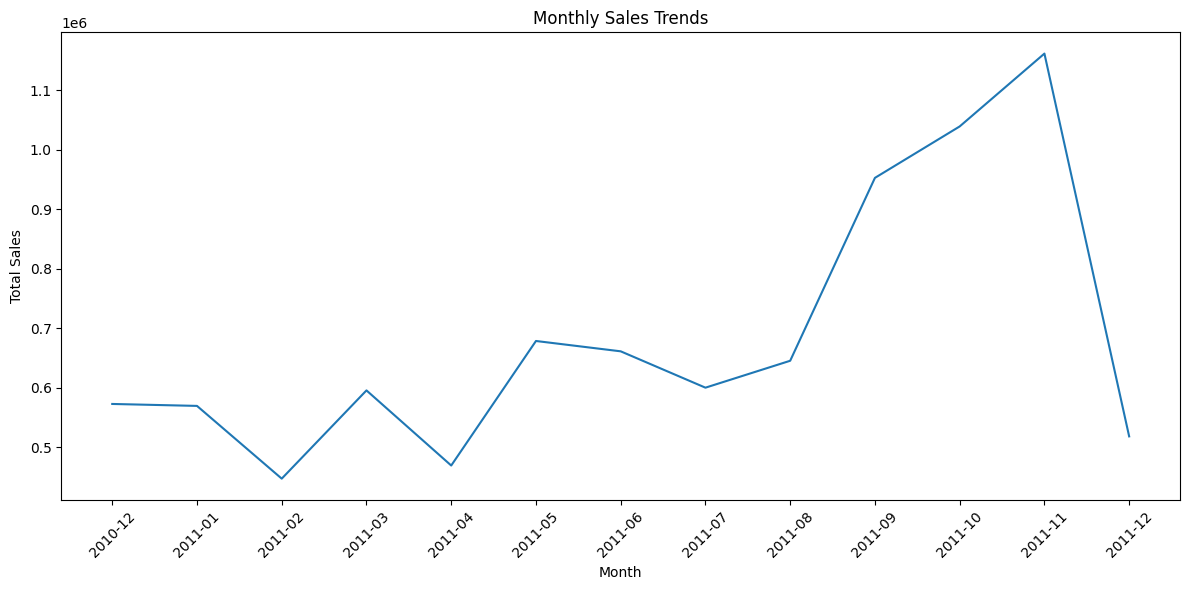

In [8]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Identify the top 10 best-selling products based on the total quantity sold and the top 10 products by total revenue.



In [9]:
top_selling_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
top_selling_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

print("Top 10 Best-Selling Products by Quantity:")
display(top_selling_products_quantity)

print("\nTop 10 Products by Total Revenue:")
display(top_selling_products_revenue)

Top 10 Best-Selling Products by Quantity:


,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725
5,ASSORTED COLOUR BIRD ORNAMENT,35362
6,PACK OF 72 RETROSPOT CAKE CASES,33693
7,POPCORN HOLDER,30931
8,RABBIT NIGHT LIGHT,27202
9,MINI PAINT SET VINTAGE,26076



Top 10 Products by Total Revenue:


,Description,TotalPrice
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


**Reasoning**:
Analyze customer purchase frequency and the average order value per customer.



In [10]:
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_frequency.columns = ['CustomerID', 'Frequency']

customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'TotalRevenue']

customer_analysis = pd.merge(customer_frequency, customer_revenue, on='CustomerID')

customer_analysis['AverageOrderValue'] = customer_analysis['TotalRevenue'] / customer_analysis['Frequency']

print("Customer Purchase Frequency and Average Order Value:")
display(customer_analysis.head())

Customer Purchase Frequency and Average Order Value:


,CustomerID,Frequency,TotalRevenue,AverageOrderValue
0,12346.0,1,77183.60,77183.600000
1,12347.0,7,4310.00,615.714286
2,12348.0,4,1797.24,449.310000
3,12349.0,1,1757.55,1757.550000
4,12350.0,1,334.40,334.400000


**Reasoning**:
Determine the number of unique customers per country and create a visualization to show the distribution of sales across different countries, excluding the United Kingdom.



Number of Unique Customers per Country:


,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


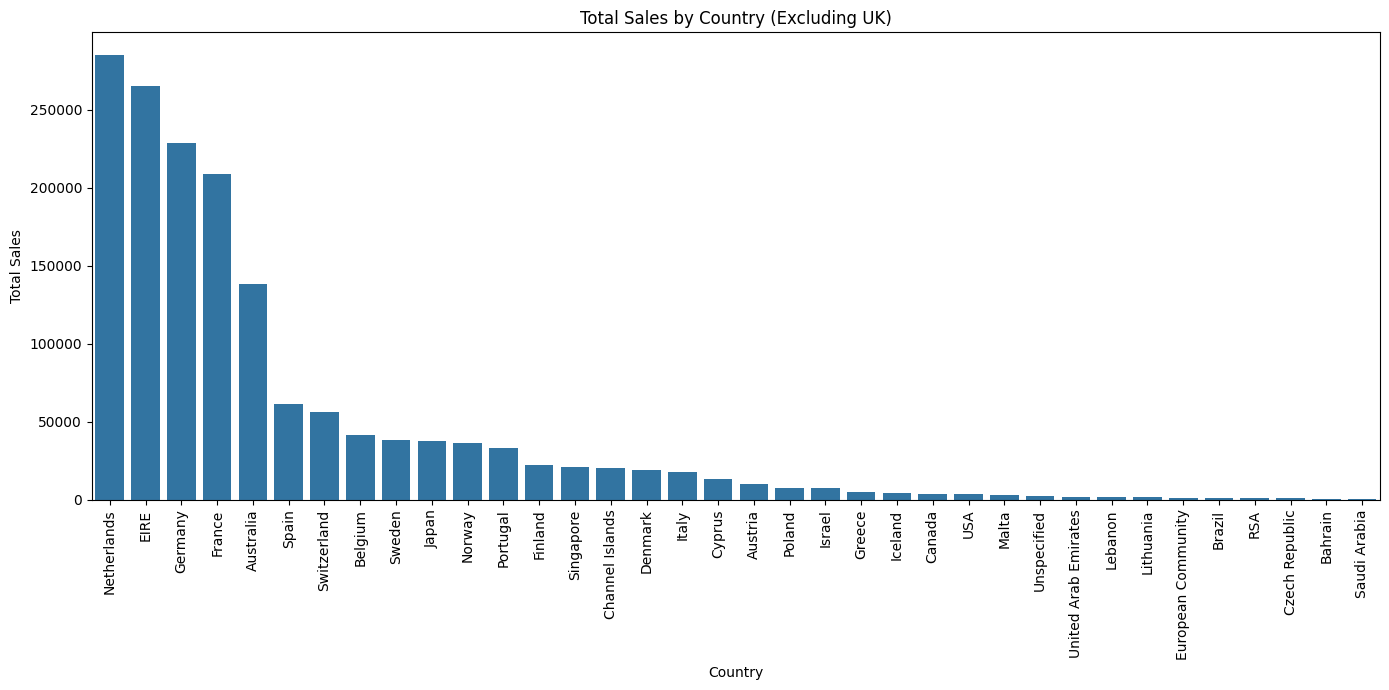

In [11]:
customers_per_country = df.groupby('Country')['CustomerID'].nunique().reset_index()
customers_per_country = customers_per_country.sort_values('CustomerID', ascending=False)

print("Number of Unique Customers per Country:")
display(customers_per_country.head())

sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
sales_by_country = sales_by_country.sort_values('TotalPrice', ascending=False)

sales_by_country_excluding_uk = sales_by_country[sales_by_country['Country'] != 'United Kingdom']

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalPrice', data=sales_by_country_excluding_uk)
plt.title('Total Sales by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Customer segmentation (e.g., using rfm analysis)

### Subtask:
Calculate Recency, Frequency, and Monetary values for each customer and group customers into segments.


**Reasoning**:
Calculate Recency, Frequency, and Monetary values for each customer and create an RFM DataFrame.



In [12]:
latest_date = df['InvoiceDate'].max()

rfm_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (latest_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

display(rfm_df.head())

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


**Reasoning**:
Define RFM scores by segmenting Recency, Frequency, and Monetary into quartiles and combine the scores to create a single RFM segment for each customer.



In [15]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])

# For Frequency and Monetary, use cut with duplicates='drop' and then assign scores
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=False, duplicates='drop') + 1
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=False, duplicates='drop') + 1

rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

display(rfm_df.head())

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,3,4,434
2,12348.0,74,4,1797.24,2,2,4,224
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


## Cohort analysis

### Subtask:
Analyze customer retention and behavior over time based on their acquisition cohort.


**Reasoning**:
Extract the first purchase month for each customer and create a new DataFrame with customer ID, cohort, and transaction month.



In [16]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
customer_cohort = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
customer_cohort.columns = ['CustomerID', 'CohortMonth']

df_cohort = df.merge(customer_cohort, on='CustomerID', how='left')
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.to_period('M')
df_cohort[['CustomerID', 'CohortMonth', 'InvoiceMonth']].head()

,CustomerID,CohortMonth,InvoiceMonth
0,17850.0,2010-12,2010-12
1,17850.0,2010-12,2010-12
2,17850.0,2010-12,2010-12
3,17850.0,2010-12,2010-12
4,17850.0,2010-12,2010-12


**Reasoning**:
Calculate the number of unique customers per cohort and month, pivot the data to create a cohort matrix, calculate the retention rate, and then visualize the retention matrix using a heatmap.



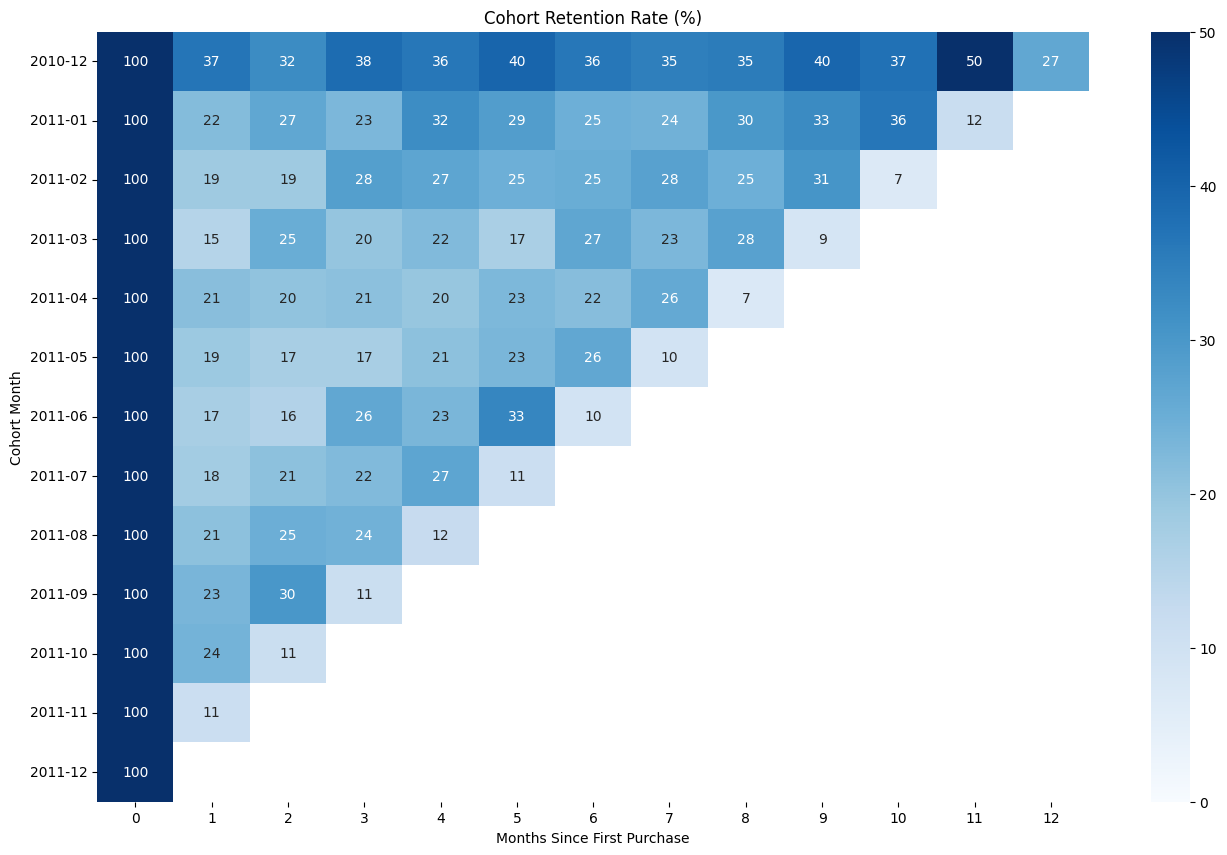

In [17]:
cohort_counts = df_cohort.groupby(['CohortMonth', 'InvoiceMonth']).agg(
    n_customers=('CustomerID', 'nunique')
).reset_index()

cohort_counts['period_number'] = (cohort_counts.InvoiceMonth - cohort_counts.CohortMonth).apply(lambda x: x.n)

cohort_matrix = cohort_counts.pivot_table(
    index='CohortMonth',
    columns='period_number',
    values='n_customers'
)

cohort_sizes = cohort_matrix.iloc[:, 0]
retention_matrix = cohort_matrix.divide(cohort_sizes, axis=0) * 100

plt.figure(figsize=(16, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap='Blues', vmin=0, vmax=50)
plt.title('Cohort Retention Rate (%)')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.yticks(rotation=0)
plt.show()

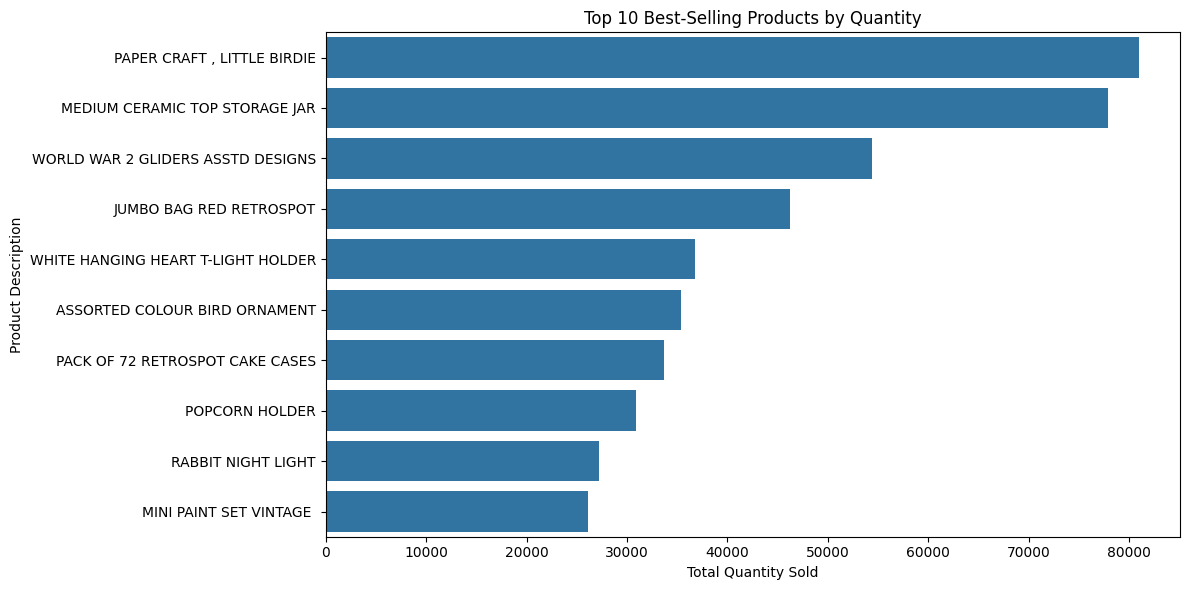

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_selling_products_quantity)
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

## Product analysis

### Subtask:
Identify popular products and product associations, and analyze product performance and profitability.


**Reasoning**:
Calculate the total revenue for each product and display the top 10 products by revenue.



In [18]:
product_revenue = df.groupby('Description')['TotalPrice'].sum().reset_index()
product_revenue = product_revenue.sort_values('TotalPrice', ascending=False)
print("Top 10 Products by Total Revenue:")
display(product_revenue.head(10))

Top 10 Products by Total Revenue:


,Description,TotalPrice
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142592.95
3698,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
1762,JUMBO BAG RED RETROSPOT,85220.78
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
2611,POSTAGE,77803.96
2345,PARTY BUNTING,68844.33
216,ASSORTED COLOUR BIRD ORNAMENT,56580.34
2130,Manual,53779.93
2656,RABBIT NIGHT LIGHT,51346.20


**Reasoning**:
Calculate the average price and total quantity sold for each product and store them in a new DataFrame called `product_performance`.



In [19]:
product_performance = df.groupby('Description').agg(
    AveragePrice=('UnitPrice', 'mean'),
    TotalQuantitySold=('Quantity', 'sum')
).reset_index()

display(product_performance.head())

,Description,AveragePrice,TotalQuantitySold
0,4 PURPLE FLOCK DINNER CANDLES,2.324359,140
1,50'S CHRISTMAS GIFT BAG LARGE,1.248073,1885
2,DOLLY GIRL BEAKER,1.243841,2398
3,I LOVE LONDON MINI BACKPACK,4.138571,360
4,I LOVE LONDON MINI RUCKSACK,4.150000,1


## Summary:

### Data Analysis Key Findings

* The initial dataset had significant missing values in 'Description' (1454) and 'CustomerID' (135080). These missing `CustomerID` values were removed, and 'InvoiceDate' was converted to datetime objects. Rows with non-positive 'Quantity' or 'UnitPrice' were filtered out.
* The monthly sales trend shows fluctuations throughout the period.
* The top 10 best-selling products were identified by both quantity and revenue.
* Customer purchase frequency and average order value were calculated for each customer.
* The United Kingdom has the highest number of unique customers.
* The cohort analysis revealed that customer retention rates generally decrease over time for all cohorts.
* "PAPER CRAFT , LITTLE BIRDIE" was the product that generated the highest revenue.
* Product performance metrics like average price and total quantity sold were calculated.
* A list of products within each invoice was generated to explore product associations.

### Insights or Next Steps

* Further investigation into the monthly sales fluctuations could help identify potential seasonality or impacts of marketing campaigns.
* The RFM segmentation and product association data can be used to develop targeted marketing strategies and optimize product recommendations.

## Project Summary: E-commerce Sales Analysis

This project analyzed an e-commerce dataset to generate business insights through a step-by-step process.

**Data Cleaning and Preprocessing:** Initial data cleaning involved handling missing 'CustomerID' values and converting 'InvoiceDate' to datetime objects. Rows with non-positive quantities or unit prices were removed, resulting in a clean dataset for analysis.

**Exploratory Data Analysis (EDA):** EDA revealed fluctuating monthly sales trends and identified top-selling products by both quantity and revenue. Customer purchase frequency and average order value were calculated, highlighting the United Kingdom as having the most unique customers. Sales distribution across countries (excluding the UK) was also visualized.

**Customer Segmentation (RFM Analysis):** Recency, Frequency, and Monetary values were calculated for each customer. Customers were segmented based on these values, and the distribution and average RFM scores for each segment were analyzed to understand customer behavior patterns.

**Cohort Analysis:** Cohort analysis was performed to examine customer retention over time based on their first purchase month. A heatmap visualized the retention matrix, showing that retention rates generally decrease across cohorts over time.

**Product Analysis:** Product analysis focused on identifying popular products and their performance. Top products by revenue were highlighted, and product performance metrics like average price and total quantity sold were calculated.

**Key Insights:** The analysis provided insights into sales trends, customer behavior, and product performance. The RFM and cohort analysis offer valuable information for targeted marketing and retention strategies. Further investigation into sales seasonality and product associations could yield additional actionable insights.